In [122]:
#Import dependencies 

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import NullFormatter
from matplotlib.dates import MonthLocator, DateFormatter
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress
import statsmodels.api as sm


In [2]:
#Identify files 
file1='GILD.csv'
file2='IHE.csv'
file3='JNJ.csv'
file4='LLY.csv'
file5='PFE.csv'
file6='SPY.csv'
file7='SYK.csv'
file8='VIX.csv'

# Read CSV files 
gild=pd.read_csv(file1)
ihe=pd.read_csv(file2)
jnj=pd.read_csv(file3)
lly=pd.read_csv(file4)
pfe=pd.read_csv(file5)
spy=pd.read_csv(file6)
syk=pd.read_csv(file7)
vix=pd.read_csv(file8)


In [3]:
#Rename columns 
gild.columns=['Date', 'GILD Open', 'GILD High', 'GILD Low', 'GILD Close', 'GILD Adj Close', 'GILD Volume']
ihe.columns=['Date', 'IHE Open', 'IHE High', 'IHE Low', 'IHE Close', 'IHE Adj Close', 'IHE Volume']
jnj.columns=['Date', 'JNJ Open', 'JNJ High', 'JNJ Low', 'JNJ Close', 'JNJ Adj Close', 'JNJ Volume']
lly.columns=['Date', 'LLY Open', 'LLY High', 'LLY Low', 'LLY Close', 'LLY Adj Close', 'LLY Volume']
pfe.columns=['Date', 'PFE Open', 'PFE High', 'PFE Low', 'PFE Close', 'PFE Adj Close', 'PFE Volume']
spy.columns=['Date', 'SPY Open', 'SPY High', 'SPY Low', 'SPY Close', 'SPY Adj Close', 'SPY Volume']
syk.columns=['Date', 'SYK Open', 'SYK High', 'SYK Low', 'SYK Close', 'SYK Adj Close', 'SYK Volume']
vix.columns=['Date', 'VIX Open', 'VIX High', 'VIX Low', 'VIX Close', 'VIX Adj Close', 'VIX Volume']


# Ensure all files are sorted by date 
gild = gild.sort_values(by=['Date'], ascending=True)
ihe = ihe.sort_values(by=['Date'], ascending=True)
jnj = jnj.sort_values(by=['Date'], ascending=True)
lly = lly.sort_values(by=['Date'], ascending=True)
pfe = pfe.sort_values(by=['Date'], ascending=True)
spy = spy.sort_values(by=['Date'], ascending=True)
syk = syk.sort_values(by=['Date'], ascending=True)
vix = vix.sort_values(by=['Date'], ascending=True)


In [4]:
#Identify the first value 
first_gild = gild.loc[0, 'GILD Close']
first_ihe = ihe.loc[0, 'IHE Close']
first_jnj = jnj.loc[0, 'JNJ Close']
first_lly = lly.loc[0, 'LLY Close']
first_pfe = pfe.loc[0, 'PFE Close']
first_spy = spy.loc[0, 'SPY Close']
first_syk = syk.loc[0, 'SYK Close']
first_vix = vix.loc[0, 'VIX Close']

#Convert dates to datetime
gild["Date"] = pd.to_datetime(gild["Date"])
ihe["Date"] = pd.to_datetime(ihe["Date"])
jnj["Date"] = pd.to_datetime(jnj["Date"])
lly["Date"] = pd.to_datetime(lly["Date"])
pfe["Date"] = pd.to_datetime(pfe["Date"])
spy["Date"] = pd.to_datetime(spy["Date"])
syk["Date"] = pd.to_datetime(syk["Date"])
vix["Date"] = pd.to_datetime(vix["Date"])

#Calculate percent changes over time for each 
gildpct = ((gild['GILD Close']) - first_gild)/first_gild * 100 
ihepct = ((ihe['IHE Close']) - first_ihe)/first_ihe * 100 
jnjpct = ((jnj['JNJ Close']) - first_jnj)/first_jnj * 100 
llypct = ((lly['LLY Close']) - first_lly)/first_lly * 100 
pfepct = ((pfe['PFE Close']) - first_pfe)/first_pfe * 100 
spypct = ((spy['SPY Close'])- first_spy)/first_spy * 100
sykpct = ((syk['SYK Close']) - first_syk)/first_syk * 100 
vixpct = ((vix['VIX Close']) - first_vix)/first_vix * 100 


0.0321401023483643


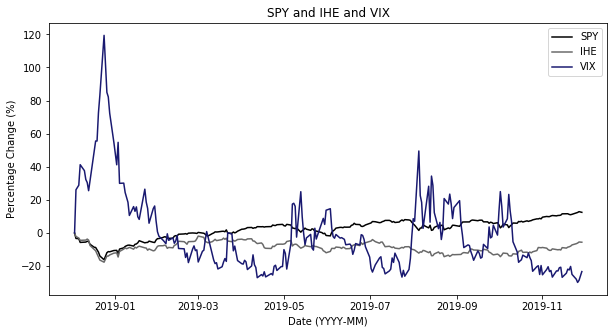

In [6]:
#Plot SPY and IHE and VIX
plt.figure(figsize=(10,5))
plt.plot(spy['Date'], spypct, c="k", label="SPY")
plt.plot(ihe['Date'], ihepct, c="dimgrey", label="IHE")
plt.plot(vix['Date'], vixpct, c="midnightblue", label="VIX")
plt.title("SPY and IHE and VIX")
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Percentage Change (%)')
plt.legend()

#Correlation between SPY and IHE
spy_ihe_corr = spypct.corr(ihepct)
print(spy_ihe_corr)

-0.09783032549483128


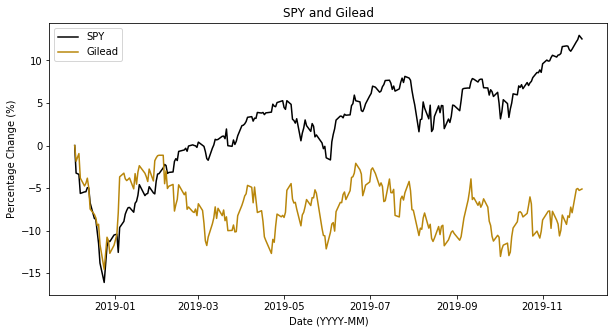

In [7]:
# Plot SPY and GILD 
plt.figure(figsize=(10,5))
plt.plot(spy['Date'], spypct, c="k", label="SPY")
plt.plot(gild['Date'], gildpct, c="darkgoldenrod", label="Gilead")
plt.title("SPY and Gilead")
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Percentage Change (%)')
plt.legend()

#Correlation between SPY and GILD
spy_gild_corr = spypct.corr(gildpct)
print(spy_gild_corr)

0.12235392128892403


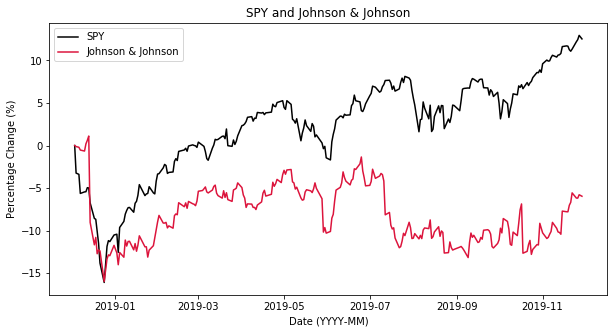

In [8]:
#Plot SPY and JNJ
plt.figure(figsize=(10,5))
plt.plot(spy['Date'], spypct, c="k", label="SPY")
plt.plot(jnj['Date'], jnjpct, c="crimson", label="Johnson & Johnson")
plt.title("SPY and Johnson & Johnson")
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Percentage Change (%)')
plt.legend()

#Correlation between SPY and JNJ
spy_jnj_corr = spypct.corr(jnjpct)
print(spy_jnj_corr)

-0.21971471138937368


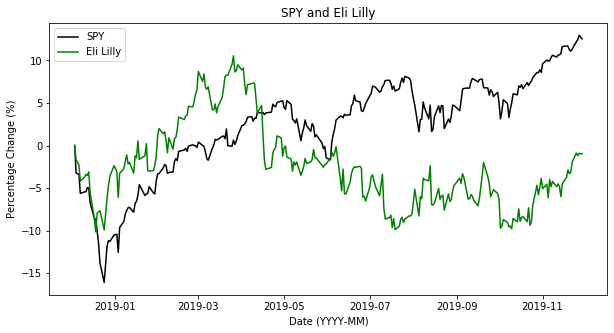

In [9]:
#Plot SPY and LLY
plt.figure(figsize=(10,5))
plt.plot(spy['Date'], spypct, c="k", label="SPY")
plt.plot(lly['Date'], llypct, c="green", label="Eli Lilly")
plt.title("SPY and Eli Lilly")
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Percentage Change (%)')
plt.legend()

#Correlation between SPY and LLY
spy_lly_corr = spypct.corr(llypct)
print(spy_lly_corr)

-0.4915349739424342


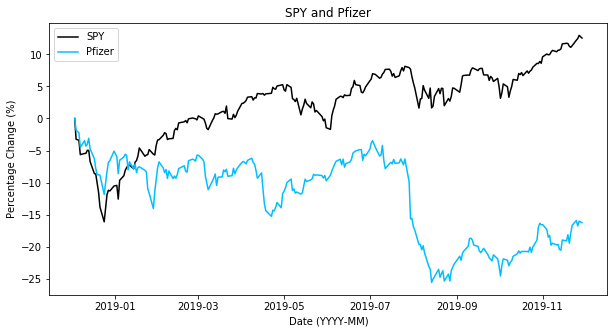

In [10]:
#Plot SPY and PFE
plt.figure(figsize=(10,5))
plt.plot(spy['Date'], spypct, c="k", label="SPY")
plt.plot(pfe['Date'], pfepct, c="deepskyblue", label='Pfizer')
plt.title("SPY and Pfizer")
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Percentage Change (%)')
plt.legend()

#Correlation between SPY and PFE
spy_pfe_corr = spypct.corr(pfepct)
print(spy_pfe_corr)

0.8541153212898213


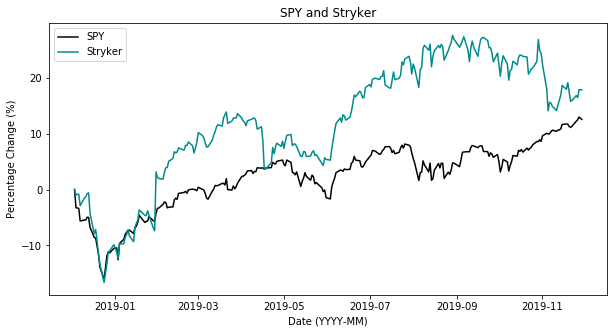

In [11]:
#Plot SPY and SYK
plt.figure(figsize=(10,5))
plt.plot(spy['Date'], spypct, c="k", label="SPY")
plt.plot(syk['Date'], sykpct, c="darkcyan", label='Stryker')
plt.title("SPY and Stryker")
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Percentage Change (%)')
plt.legend()

#Correlation between SPY and SYK
spy_syk_corr = spypct.corr(sykpct)
print(spy_syk_corr)

Text(0, 0.5, 'Percentage Change (%)')

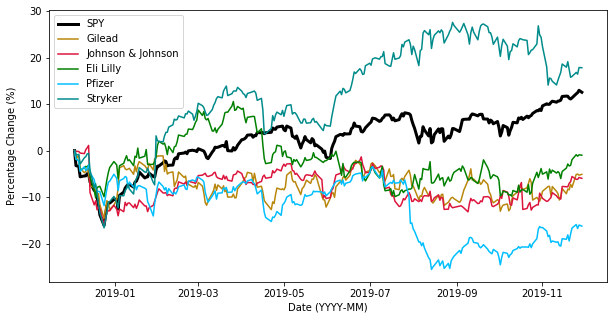

In [12]:
#Plot SPY and all companies
plt.figure(figsize=(10,5))
plt.plot(spy['Date'], spypct, c="k", label="SPY", linewidth=3.0)
plt.plot(gild['Date'], gildpct, c="darkgoldenrod", label="Gilead")
plt.plot(jnj['Date'], jnjpct, c="crimson", label="Johnson & Johnson")
plt.plot(lly['Date'], llypct, c="green", label="Eli Lilly")
plt.plot(pfe['Date'], pfepct, c="deepskyblue", label='Pfizer')
plt.plot(syk['Date'], sykpct, c="darkcyan", label='Stryker')
plt.legend()

plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Percentage Change (%)')



0.4993214797646545


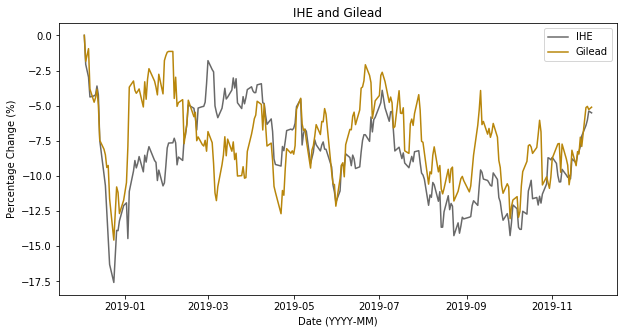

In [13]:
#Plot IHE and GILD
plt.figure(figsize=(10,5))
plt.plot(ihe['Date'], ihepct, c="dimgrey", label="IHE")
plt.plot(gild['Date'], gildpct, c="darkgoldenrod", label="Gilead")
plt.title("IHE and Gilead")
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Percentage Change (%)')
plt.legend()

#Correlation between IHE and IHE
ihe_gild_corr = ihepct.corr(gildpct)
print(ihe_gild_corr)

0.7779109905730757


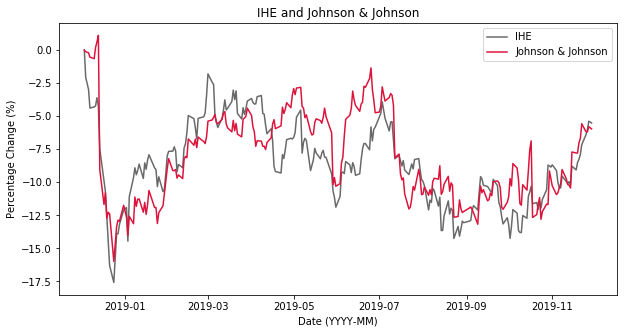

In [14]:
#Plot IHE and JNJ
plt.figure(figsize=(10,5))
plt.plot(ihe['Date'], ihepct, c="dimgrey", label="IHE")
plt.plot(jnj['Date'], jnjpct, c="crimson", label="Johnson & Johnson")
plt.title("IHE and Johnson & Johnson")
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Percentage Change (%)')
plt.legend()

#Correlation between IHE and JNJ
ihe_jnj_corr = ihepct.corr(jnjpct)
print(ihe_jnj_corr)

0.7194385932934265


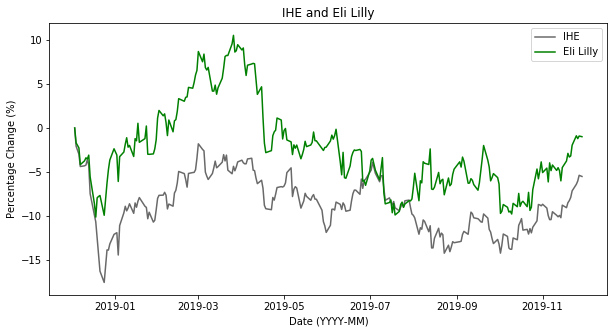

In [15]:
#Plot IHE and LLY
plt.figure(figsize=(10,5))
plt.plot(ihe['Date'], ihepct, c="dimgrey", label="IHE")
plt.plot(lly['Date'], llypct, c="green", label="Eli Lilly")
plt.title("IHE and Eli Lilly")
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Percentage Change (%)')
plt.legend()

#Correlation between IHE and LLY
ihe_lly_corr = ihepct.corr(llypct)
print(ihe_lly_corr)

0.660835204783841


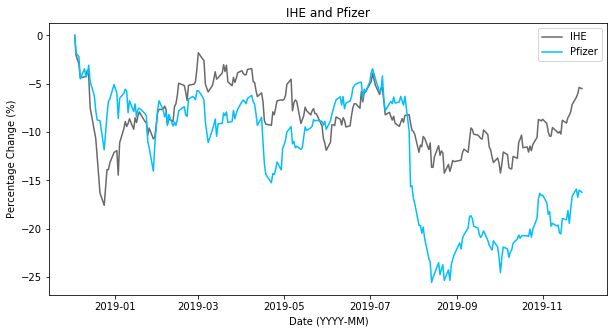

In [16]:
#Plot IHE and PFE
plt.figure(figsize=(10,5))
plt.plot(ihe['Date'], ihepct, c="dimgrey", label="IHE")
plt.plot(pfe['Date'], pfepct, c="deepskyblue", label='Pfizer')
plt.title("IHE and Pfizer")
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Percentage Change (%)')
plt.legend()

#Correlation between IHE and PFE
ihe_pfe_corr = ihepct.corr(pfepct)
print(ihe_pfe_corr)

-0.16611872785396473


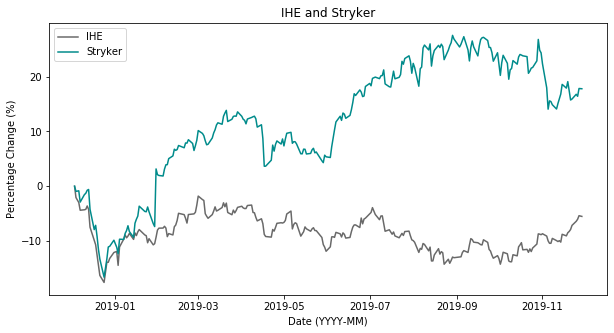

In [17]:
#Plot IHE and SYK
plt.figure(figsize=(10,5))
plt.plot(ihe['Date'], ihepct, c="dimgrey", label="IHE")
plt.plot(syk['Date'], sykpct, c="darkcyan", label='Stryker')
plt.title("IHE and Stryker")
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Percentage Change (%)')
plt.legend()

#Correlation between IHE and SYK
ihe_syk_corr = ihepct.corr(sykpct)
print(ihe_syk_corr)

Text(0, 0.5, 'Percentage Change (%)')

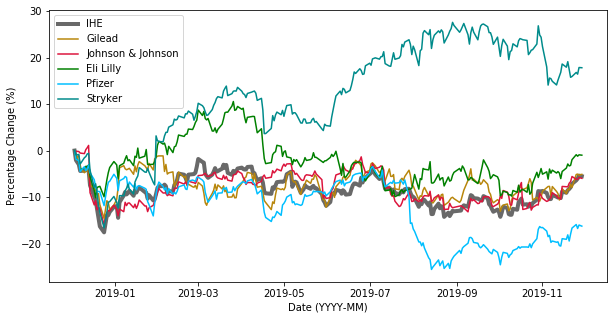

In [18]:
#Plot IHE and all companies
plt.figure(figsize=(10,5))
plt.plot(ihe['Date'], ihepct, c="dimgrey", label="IHE", linewidth=4.0)
plt.plot(gild['Date'], gildpct, c="darkgoldenrod", label="Gilead")
plt.plot(jnj['Date'], jnjpct, c="crimson", label="Johnson & Johnson")
plt.plot(lly['Date'], llypct, c="green", label="Eli Lilly")
plt.plot(pfe['Date'], pfepct, c="deepskyblue", label='Pfizer')
plt.plot(syk['Date'], sykpct, c="darkcyan", label='Stryker')
plt.legend()

plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Percentage Change (%)')


-0.19254400884259254


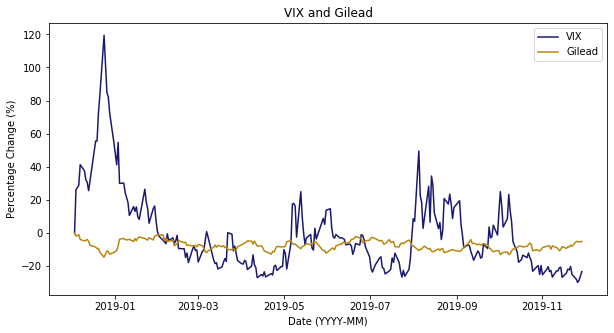

In [19]:
#Plot VIX and GILD
plt.figure(figsize=(10,5))
plt.plot(vix['Date'], vixpct, c="midnightblue", label="VIX")
plt.plot(gild['Date'], gildpct, c="darkgoldenrod", label="Gilead")
plt.title("VIX and Gilead")
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Percentage Change (%)')
plt.legend()

#Correlation between VIX and GILD
vix_gild_corr = vixpct.corr(gildpct)
print(vix_gild_corr)

-0.3204578004599173


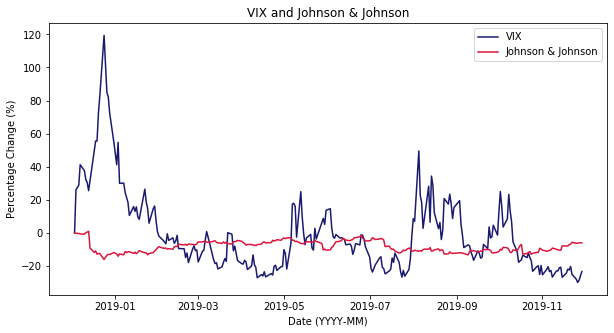

In [20]:
#Plot VIX and JNJ
plt.figure(figsize=(10,5))
plt.plot(vix['Date'], vixpct, c="midnightblue", label="VIX")
plt.plot(jnj['Date'], jnjpct, c="crimson", label="Johnson & Johnson")
plt.title("VIX and Johnson & Johnson")
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Percentage Change (%)')
plt.legend()

#Correlation between VIX and JNJ
vix_jnj_corr = vixpct.corr(jnjpct)
print(vix_jnj_corr)

-0.2578464218151302


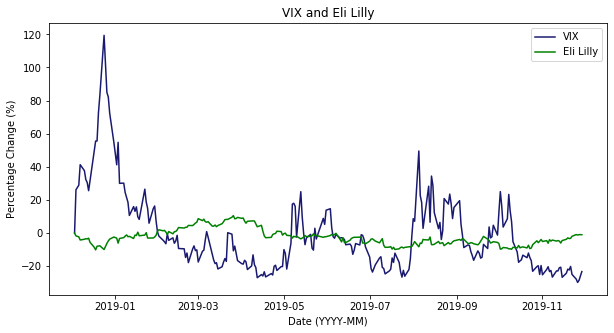

In [21]:
#Plot VIX and LLY
plt.figure(figsize=(10,5))
plt.plot(vix['Date'], vixpct, c="midnightblue", label="VIX")
plt.plot(lly['Date'], llypct, c="green", label="Eli Lilly")
plt.title("VIX and Eli Lilly")
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Percentage Change (%)')
plt.legend()

#Correlation between VIX and LLY
vix_lly_corr = vixpct.corr(llypct)
print(vix_lly_corr)

0.058528677130109154


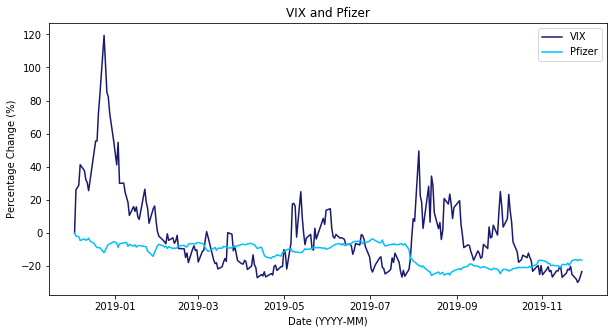

In [22]:
#Plot VIX and PFE
plt.figure(figsize=(10,5))
plt.plot(vix['Date'], vixpct, c="midnightblue", label="VIX")
plt.plot(pfe['Date'], pfepct, c="deepskyblue", label='Pfizer')
plt.title("VIX and Pfizer")
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Percentage Change (%)')
plt.legend()

#Correlation between VIX and PFE
vix_pfe_corr = vixpct.corr(pfepct)
print(vix_pfe_corr)

-0.5355816377479252


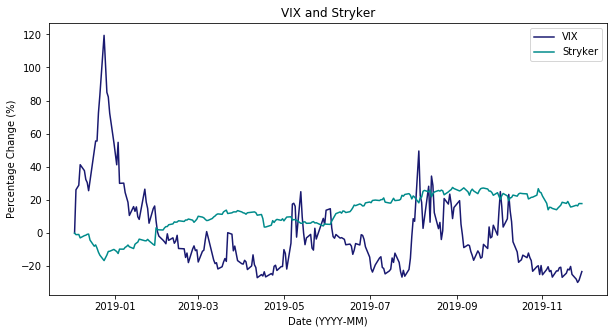

In [23]:
#Plot VIX and SYK
plt.figure(figsize=(10,5))
plt.plot(vix['Date'], vixpct, c="midnightblue", label="VIX")
plt.plot(syk['Date'], sykpct, c="darkcyan", label='Stryker')
plt.title("VIX and Stryker")
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Percentage Change (%)')
plt.legend()

#Correlation between VIX and SYK
vix_syk_corr = vixpct.corr(sykpct)
print(vix_syk_corr)

Text(0, 0.5, 'Percentage Change (%)')

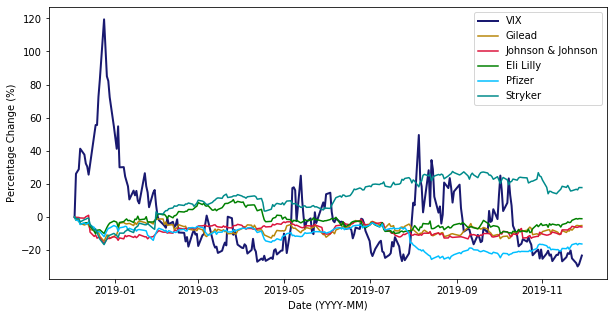

In [24]:
#Plot VIX and all companies
plt.figure(figsize=(10,5))
plt.plot(vix['Date'], vixpct, c="midnightblue", label="VIX", linewidth=2.0)
plt.plot(gild['Date'], gildpct, c="darkgoldenrod", label="Gilead")
plt.plot(jnj['Date'], jnjpct, c="crimson", label="Johnson & Johnson")
plt.plot(lly['Date'], llypct, c="green", label="Eli Lilly")
plt.plot(pfe['Date'], pfepct, c="deepskyblue", label='Pfizer')
plt.plot(syk['Date'], sykpct, c="darkcyan", label='Stryker')
plt.legend()

plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Percentage Change (%)')

In [94]:
# Create DataFrame with Percent Change variables 
percentchanges = spy.loc[:, ["Date"]]
percentchanges["spypct"] = spypct
percentchanges["ihepct"] = ihepct
percentchanges["vixpct"] = vixpct
percentchanges["gildpct"] = gildpct
percentchanges["jnjpct"] = jnjpct
percentchanges["llypct"] = llypct
percentchanges["pfepct"] = pfepct
percentchanges["sykpct"] = sykpct   

percentchanges.head()

,Date,spypct,ihepct,vixpct,gildpct,jnjpct,llypct,pfepct,sykpct
0,2018-12-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2018-12-04,-3.240239,-2.066682,26.155710,-1.848713,-0.123116,-1.687479,-1.848234,-0.943124
2,2018-12-06,-3.387036,-2.972034,28.892942,-0.945525,-0.205186,-2.261223,-2.196134,-0.833859
3,2018-12-07,-5.631930,-4.383120,41.301695,-3.824441,-0.533489,-4.168069,-4.500987,-2.898380
4,2018-12-10,-5.452911,-4.301948,37.712881,-4.755861,-0.649759,-3.737767,-3.457273,-1.535452


In [121]:
# Correlation Matrix 

corr = percentchanges.corr()
corr.style.background_gradient(cmap='RdYlGn', axis=None).set_precision(2)

,spypct,ihepct,vixpct,gildpct,jnjpct,llypct,pfepct,sykpct
spypct,1,0.032,-0.76,-0.098,0.12,-0.22,-0.49,0.85
ihepct,0.032,1,-0.46,0.5,0.78,0.72,0.66,-0.17
vixpct,-0.76,-0.46,1,-0.19,-0.32,-0.26,0.059,-0.54
gildpct,-0.098,0.5,-0.19,1,0.33,0.14,0.55,-0.24
jnjpct,0.12,0.78,-0.32,0.33,1,0.43,0.51,-0.07
llypct,-0.22,0.72,-0.26,0.14,0.43,1,0.45,-0.29
pfepct,-0.49,0.66,0.059,0.55,0.51,0.45,1,-0.63
sykpct,0.85,-0.17,-0.54,-0.24,-0.07,-0.29,-0.63,1


In [167]:
#Multiple Linear Regression: SPY and VIX, IHE
x = percentchanges[['spypct','vixpct']]
y = percentchanges['ihepct']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 ihepct   R-squared (uncentered):                   0.427
Model:                            OLS   Adj. R-squared (uncentered):              0.422
Method:                 Least Squares   F-statistic:                              92.36
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                    1.05e-30
Time:                        20:21:32   Log-Likelihood:                         -838.33
No. Observations:                 250   AIC:                                      1681.
Df Residuals:                     248   BIC:                                      1688.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
spypct        -1.3841      0.103    -13.394      0.000      -1.588      -1.181
vixpct        -0.3080      0.027    -11.224      0.000      -0.362      -0.254
==============================================================================
Omnibus:                        4.150   Durbin-Watson:                   0.049
Prob(Omnibus):                  0.126   Jarque-Bera (JB):                4.197
Skew:                          -0.312   Prob(JB):                        0.123
Kurtosis:                       2.889   Cond. No.                         5.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
# Linear Regression: SPY and IHE
x = percentchanges['spypct']
y = percentchanges['ihepct']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 ihepct   R-squared (uncentered):                   0.136
Model:                            OLS   Adj. R-squared (uncentered):              0.132
Method:                 Least Squares   F-statistic:                              39.11
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                    1.73e-09
Time:                        20:11:01   Log-Likelihood:                         -889.67
No. Observations:                 250   AIC:                                      1781.
Df Residuals:                     249   BIC:                                      1785.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
spypct        -0.5512      0.088     -6.254      0.000      -0.725      -0.378
==============================================================================
Omnibus:                       54.748   Durbin-Watson:                   0.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.135
Skew:                          -1.142   Prob(JB):                     1.80e-22
Kurtosis:                       5.096   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
# Linear Regression: SPY and VIX
x = percentchanges['spypct']
y = percentchanges['vixpct']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 vixpct   R-squared (uncentered):                   0.516
Model:                            OLS   Adj. R-squared (uncentered):              0.514
Method:                 Least Squares   F-statistic:                              265.1
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                    4.46e-41
Time:                        20:11:01   Log-Likelihood:                         -1048.1
No. Observations:                 250   AIC:                                      2098.
Df Residuals:                     249   BIC:                                      2102.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
spypct        -2.7039      0.166    -16.281      0.000      -3.031      -2.377
==============================================================================
Omnibus:                       48.163   Durbin-Watson:                   0.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.039
Skew:                           1.047   Prob(JB):                     1.53e-18
Kurtosis:                       4.869   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
# Linear Regression: IHE and VIX
x = percentchanges['vixpct']
y = percentchanges['ihepct']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 ihepct   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):              0.008
Method:                 Least Squares   F-statistic:                              3.102
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                      0.0794
Time:                        20:22:07   Log-Likelihood:                         -906.36
No. Observations:                 250   AIC:                                      1815.
Df Residuals:                     249   BIC:                                      1818.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
vixpct        -0.0441      0.025     -1.761      0.079      -0.093       0.005
==============================================================================
Omnibus:                        9.277   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.339
Skew:                           0.439   Prob(JB):                      0.00938
Kurtosis:                       2.647   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
# Multi Linear Regression: SPY, VIX, IHE - GILD
x = percentchanges[['spypct','vixpct', 'ihepct']]
y = percentchanges['gildpct']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                gildpct   R-squared (uncentered):                   0.890
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                              668.8
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                   3.14e-118
Time:                        20:28:30   Log-Likelihood:                         -595.26
No. Observations:                 250   AIC:                                      1197.
Df Residuals:                     247   BIC:                                      1207.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
spypct         0.0088      0.051      0.172      0.864      -0.092       0.110
vixpct         0.0307      0.013      2.403      0.017       0.006       0.056
ihepct         0.8236      0.024     34.224      0.000       0.776       0.871
==============================================================================
Omnibus:                        0.407   Durbin-Watson:                   0.175
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.466
Skew:                          -0.095   Prob(JB):                        0.792
Kurtosis:                       2.907   Cond. No.                         7.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
# Multi Linear Regression: SPY, VIX, IHE - JNJ
x = percentchanges[['spypct','vixpct', 'ihepct']]
y = percentchanges['jnjpct']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 jnjpct   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              1601.
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                   1.70e-161
Time:                        20:29:46   Log-Likelihood:                         -520.63
No. Observations:                 250   AIC:                                      1047.
Df Residuals:                     247   BIC:                                      1058.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
spypct         0.2672      0.038      7.006      0.000       0.192       0.342
vixpct         0.0662      0.009      6.989      0.000       0.048       0.085
ihepct         1.0158      0.018     56.894      0.000       0.981       1.051
==============================================================================
Omnibus:                       15.082   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.826
Skew:                           0.584   Prob(JB):                     0.000366
Kurtosis:                       2.607   Cond. No.                         7.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:
# Multi Linear Regression: SPY, VIX, IHE - LLY
x = percentchanges[['spypct','vixpct', 'ihepct']]
y = percentchanges['llypct']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 llypct   R-squared (uncentered):                   0.620
Model:                            OLS   Adj. R-squared (uncentered):              0.615
Method:                 Least Squares   F-statistic:                              134.3
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                    1.32e-51
Time:                        20:30:20   Log-Likelihood:                         -659.27
No. Observations:                 250   AIC:                                      1325.
Df Residuals:                     247   BIC:                                      1335.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
spypct        -0.7290      0.066    -10.977      0.000      -0.860      -0.598
vixpct        -0.1814      0.016    -10.997      0.000      -0.214      -0.149
ihepct         0.1567      0.031      5.040      0.000       0.095       0.218
==============================================================================
Omnibus:                        4.597   Durbin-Watson:                   0.154
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                4.423
Skew:                           0.324   Prob(JB):                        0.110
Kurtosis:                       3.060   Cond. No.                         7.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
# Multi Linear Regression: SPY, VIX, IHE - PFE
x = percentchanges[['spypct','vixpct', 'ihepct']]
y = percentchanges['pfepct']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 pfepct   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              1185.
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                   2.97e-146
Time:                        20:30:38   Log-Likelihood:                         -671.84
No. Observations:                 250   AIC:                                      1350.
Df Residuals:                     247   BIC:                                      1360.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
spypct        -0.6978      0.070     -9.991      0.000      -0.835      -0.560
vixpct        -0.0349      0.017     -2.011      0.045      -0.069      -0.001
ihepct         1.2478      0.033     38.169      0.000       1.183       1.312
==============================================================================
Omnibus:                       21.908   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.906
Skew:                           0.788   Prob(JB):                     2.37e-06
Kurtosis:                       2.964   Cond. No.                         7.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
# Multi Linear Regression: SPY, VIX, IHE - SYK
x = percentchanges[['spypct','vixpct', 'ihepct']]
y = percentchanges['sykpct']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 sykpct   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              716.2
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                   1.64e-121
Time:                        20:31:02   Log-Likelihood:                         -767.58
No. Observations:                 250   AIC:                                      1541.
Df Residuals:                     247   BIC:                                      1552.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
spypct         1.6992      0.102     16.590      0.000       1.498       1.901
vixpct         0.0097      0.025      0.382      0.703      -0.040       0.060
ihepct        -0.9044      0.048    -18.864      0.000      -0.999      -0.810
==============================================================================
Omnibus:                       15.406   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.686
Skew:                          -0.464   Prob(JB):                      0.00176
Kurtosis:                       2.402   Cond. No.                         7.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
# Multi Linear Regression: SPY, IHE - GILD
x = percentchanges[['spypct', 'ihepct']]
y = percentchanges['gildpct']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                gildpct   R-squared (uncentered):                   0.888
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                              981.4
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                   1.54e-118
Time:                        20:34:40   Log-Likelihood:                         -598.15
No. Observations:                 250   AIC:                                      1200.
Df Residuals:                     248   BIC:                                      1207.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
spypct        -0.0926      0.030     -3.130      0.002      -0.151      -0.034
ihepct         0.7900      0.020     39.931      0.000       0.751       0.829
==============================================================================
Omnibus:                        5.803   Durbin-Watson:                   0.158
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.803
Skew:                          -0.373   Prob(JB):                       0.0549
Kurtosis:                       2.985   Cond. No.                         1.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [185]:
# Multi Linear Regression: SPY, IHE - JNJ
x = percentchanges[['spypct', 'ihepct']]
y = percentchanges['jnjpct']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 jnjpct   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                              1993.
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                   1.60e-153
Time:                        20:34:41   Log-Likelihood:                         -543.19
No. Observations:                 250   AIC:                                      1090.
Df Residuals:                     248   BIC:                                      1097.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
spypct         0.0482      0.024      2.030      0.043       0.001       0.095
ihepct         0.9434      0.016     59.405      0.000       0.912       0.975
==============================================================================
Omnibus:                       16.409   Durbin-Watson:                   0.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.449
Skew:                           0.360   Prob(JB):                      0.00538
Kurtosis:                       2.304   Cond. No.                         1.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
# Multi Linear Regression: SPY, IHE - LLY
x = percentchanges[['spypct', 'ihepct']]
y = percentchanges['llypct']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 llypct   R-squared (uncentered):                   0.434
Model:                            OLS   Adj. R-squared (uncentered):              0.429
Method:                 Least Squares   F-statistic:                              94.99
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                    2.36e-31
Time:                        20:34:17   Log-Likelihood:                         -709.08
No. Observations:                 250   AIC:                                      1422.
Df Residuals:                     248   BIC:                                      1429.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
spypct        -0.1291      0.046     -2.798      0.006      -0.220      -0.038
ihepct         0.3551      0.031     11.516      0.000       0.294       0.416
==============================================================================
Omnibus:                       19.738   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.522
Skew:                           0.733   Prob(JB):                     1.29e-05
Kurtosis:                       3.110   Cond. No.                         1.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
# Multi Linear Regression: SPY, IHE - PFE
x = percentchanges[['spypct', 'ihepct']]
y = percentchanges['pfepct']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 pfepct   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                              1753.
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                   4.66e-147
Time:                        20:34:15   Log-Likelihood:                         -673.87
No. Observations:                 250   AIC:                                      1352.
Df Residuals:                     248   BIC:                                      1359.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
spypct        -0.5824      0.040    -14.535      0.000      -0.661      -0.504
ihepct         1.2859      0.027     48.010      0.000       1.233       1.339
==============================================================================
Omnibus:                       18.872   Durbin-Watson:                   0.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.495
Skew:                           0.718   Prob(JB):                     2.15e-05
Kurtosis:                       3.042   Cond. No.                         1.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [181]:
# Multi Linear Regression: SPY, IHE - SYK
x = percentchanges[['spypct', 'ihepct']]
y = percentchanges['sykpct']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 sykpct   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              1078.
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                   4.77e-123
Time:                        20:33:47   Log-Likelihood:                         -767.65
No. Observations:                 250   AIC:                                      1539.
Df Residuals:                     248   BIC:                                      1546.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
spypct         1.6671      0.058     28.591      0.000       1.552       1.782
ihepct        -0.9150      0.039    -23.477      0.000      -0.992      -0.838
==============================================================================
Omnibus:                       15.265   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.440
Skew:                          -0.456   Prob(JB):                      0.00199
Kurtosis:                       2.399   Cond. No.                         1.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
# Linear Regression: SPY and GILD
x = percentchanges['spypct']
y = percentchanges['gildpct']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                gildpct   R-squared (uncentered):                   0.167
Model:                            OLS   Adj. R-squared (uncentered):              0.163
Method:                 Least Squares   F-statistic:                              49.78
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                    1.70e-11
Time:                        20:11:08   Log-Likelihood:                         -848.83
No. Observations:                 250   AIC:                                      1700.
Df Residuals:                     249   BIC:                                      1703.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
spypct        -0.5281      0.075     -7.056      0.000      -0.676      -0.381
==============================================================================
Omnibus:                       38.135   Durbin-Watson:                   0.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.209
Skew:                          -0.840   Prob(JB):                     6.92e-15
Kurtosis:                       4.853   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
# Linear Regression: SPY and JNJ
x = percentchanges['spypct']
y = percentchanges['jnjpct']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 jnjpct   R-squared (uncentered):                   0.108
Model:                            OLS   Adj. R-squared (uncentered):              0.104
Method:                 Least Squares   F-statistic:                              30.08
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                    1.02e-07
Time:                        20:11:10   Log-Likelihood:                         -883.59
No. Observations:                 250   AIC:                                      1769.
Df Residuals:                     249   BIC:                                      1773.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
spypct        -0.4718      0.086     -5.485      0.000      -0.641      -0.302
==============================================================================
Omnibus:                       26.750   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.027
Skew:                          -0.816   Prob(JB):                     1.11e-07
Kurtosis:                       3.641   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
#Linear Regression: SPY and LLY
x = percentchanges['spypct']
y = percentchanges['llypct']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 llypct   R-squared (uncentered):                   0.131
Model:                            OLS   Adj. R-squared (uncentered):              0.127
Method:                 Least Squares   F-statistic:                              37.53
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                    3.50e-09
Time:                        20:11:17   Log-Likelihood:                         -762.63
No. Observations:                 250   AIC:                                      1527.
Df Residuals:                     249   BIC:                                      1531.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
spypct        -0.3248      0.053     -6.126      0.000      -0.429      -0.220
==============================================================================
Omnibus:                       10.817   Durbin-Watson:                   0.085
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.102
Skew:                           0.510   Prob(JB):                      0.00388
Kurtosis:                       3.163   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
# Linear Regression: SPY and PFE
x = percentchanges['spypct']
y = percentchanges['pfepct']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 pfepct   R-squared (uncentered):                   0.320
Model:                            OLS   Adj. R-squared (uncentered):              0.317
Method:                 Least Squares   F-statistic:                              117.2
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                    1.24e-22
Time:                        20:11:20   Log-Likelihood:                         -965.32
No. Observations:                 250   AIC:                                      1933.
Df Residuals:                     249   BIC:                                      1936.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
spypct        -1.2913      0.119    -10.825      0.000      -1.526      -1.056
==============================================================================
Omnibus:                        2.096   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.351   Jarque-Bera (JB):                2.177
Skew:                          -0.207   Prob(JB):                        0.337
Kurtosis:                       2.805   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
# Linear Regression: SPY and SYK
x = percentchanges['spypct']
y = percentchanges['sykpct']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 sykpct   R-squared (uncentered):                   0.668
Model:                            OLS   Adj. R-squared (uncentered):              0.666
Method:                 Least Squares   F-statistic:                              500.0
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                    1.75e-61
Time:                        20:11:24   Log-Likelihood:                         -913.91
No. Observations:                 250   AIC:                                      1830.
Df Residuals:                     249   BIC:                                      1833.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
spypct         2.1715      0.097     22.361      0.000       1.980       2.363
==============================================================================
Omnibus:                       20.927   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.605
Skew:                          -0.715   Prob(JB):                     7.48e-06
Kurtosis:                       3.468   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
# Linear Regression: IHE and GILD
x = percentchanges['ihepct']
y = percentchanges['gildpct']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                gildpct   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.883
Method:                 Least Squares   F-statistic:                              1886.
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                   3.44e-118
Time:                        20:12:20   Log-Likelihood:                         -602.99
No. Observations:                 250   AIC:                                      1208.
Df Residuals:                     249   BIC:                                      1212.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ihepct         0.8129      0.019     43.433      0.000       0.776       0.850
==============================================================================
Omnibus:                        1.289   Durbin-Watson:                   0.148
Prob(Omnibus):                  0.525   Jarque-Bera (JB):                1.097
Skew:                          -0.159   Prob(JB):                        0.578
Kurtosis:                       3.069   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
# Linear Regression: IHE and JNJ
x = percentchanges['ihepct']
y = percentchanges['jnjpct']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 jnjpct   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                              3932.
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                   1.57e-154
Time:                        20:12:49   Log-Likelihood:                         -545.25
No. Observations:                 250   AIC:                                      1092.
Df Residuals:                     249   BIC:                                      1096.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ihepct         0.9315      0.015     62.704      0.000       0.902       0.961
==============================================================================
Omnibus:                       16.030   Durbin-Watson:                   0.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.023
Skew:                           0.295   Prob(JB):                       0.0110
Kurtosis:                       2.280   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
# Linear Regression: IHE and LLY
x = percentchanges['ihepct']
y = percentchanges['llypct']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 llypct   R-squared (uncentered):                   0.416
Model:                            OLS   Adj. R-squared (uncentered):              0.414
Method:                 Least Squares   F-statistic:                              177.3
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                    6.62e-31
Time:                        20:13:10   Log-Likelihood:                         -712.97
No. Observations:                 250   AIC:                                      1428.
Df Residuals:                     249   BIC:                                      1431.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ihepct         0.3869      0.029     13.315      0.000       0.330       0.444
==============================================================================
Omnibus:                       17.891   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.284
Skew:                           0.698   Prob(JB):                     3.94e-05
Kurtosis:                       2.987   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
# Linear Regression: IHE and PFE
x = percentchanges['ihepct']
y = percentchanges['pfepct']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 pfepct   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.877
Method:                 Least Squares   F-statistic:                              1787.
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                   1.34e-115
Time:                        20:13:40   Log-Likelihood:                         -750.89
No. Observations:                 250   AIC:                                      1504.
Df Residuals:                     249   BIC:                                      1507.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ihepct         1.4294      0.034     42.268      0.000       1.363       1.496
==============================================================================
Omnibus:                       14.204   Durbin-Watson:                   0.044
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.380
Skew:                           0.589   Prob(JB):                     0.000457
Kurtosis:                       2.704   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
# Linear Regression: IHE and SYK
x = percentchanges['ihepct']
y = percentchanges['sykpct']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 sykpct   R-squared (uncentered):                   0.557
Model:                            OLS   Adj. R-squared (uncentered):              0.555
Method:                 Least Squares   F-statistic:                              312.8
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                    6.80e-46
Time:                        20:14:32   Log-Likelihood:                         -949.86
No. Observations:                 250   AIC:                                      1902.
Df Residuals:                     249   BIC:                                      1905.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ihepct        -1.3256      0.075    -17.686      0.000      -1.473      -1.178
==============================================================================
Omnibus:                       61.544   Durbin-Watson:                   0.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.088
Skew:                          -1.374   Prob(JB):                     4.12e-23
Kurtosis:                       4.532   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
# Linear Regression: VIX and GILD
x = percentchanges['vixpct']
y = percentchanges['gildpct']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                gildpct   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.004
Method:                 Least Squares   F-statistic:                             0.1123
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                       0.738
Time:                        20:15:03   Log-Likelihood:                         -871.55
No. Observations:                 250   AIC:                                      1745.
Df Residuals:                     249   BIC:                                      1749.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
vixpct        -0.0073      0.022     -0.335      0.738      -0.050       0.036
==============================================================================
Omnibus:                        7.881   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                5.803
Skew:                           0.254   Prob(JB):                       0.0549
Kurtosis:                       2.454   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
# Linear Regression: VIX and JNJ
x = percentchanges['vixpct']
y = percentchanges['jnjpct']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 jnjpct   R-squared (uncentered):                   0.006
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              1.497
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                       0.222
Time:                        20:15:24   Log-Likelihood:                         -897.10
No. Observations:                 250   AIC:                                      1796.
Df Residuals:                     249   BIC:                                      1800.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
vixpct        -0.0295      0.024     -1.223      0.222      -0.077       0.018
==============================================================================
Omnibus:                       17.714   Durbin-Watson:                   0.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.931
Skew:                           0.691   Prob(JB):                     4.70e-05
Kurtosis:                       3.045   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
# Linear Regression: VIX and LLY
x = percentchanges['vixpct']
y = percentchanges['llypct']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 llypct   R-squared (uncentered):                   0.043
Model:                            OLS   Adj. R-squared (uncentered):              0.039
Method:                 Least Squares   F-statistic:                              11.13
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                    0.000977
Time:                        20:15:38   Log-Likelihood:                         -774.71
No. Observations:                 250   AIC:                                      1551.
Df Residuals:                     249   BIC:                                      1555.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
vixpct        -0.0493      0.015     -3.337      0.001      -0.078      -0.020
==============================================================================
Omnibus:                       14.376   Durbin-Watson:                   0.050
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.854
Skew:                           0.614   Prob(JB):                     0.000361
Kurtosis:                       2.887   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
# Linear Regression: VIX and PFE
x = percentchanges['vixpct']
y = percentchanges['pfepct']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 pfepct   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              1.271
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                       0.261
Time:                        20:15:53   Log-Likelihood:                         -1012.9
No. Observations:                 250   AIC:                                      2028.
Df Residuals:                     249   BIC:                                      2031.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
vixpct         0.0432      0.038      1.127      0.261      -0.032       0.119
==============================================================================
Omnibus:                       57.061   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.498
Skew:                          -0.560   Prob(JB):                     7.90e-06
Kurtosis:                       1.999   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [162]:
# Linear Regression: VIX and SYK
x = percentchanges['vixpct']
y = percentchanges['sykpct']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 sykpct   R-squared (uncentered):                   0.151
Model:                            OLS   Adj. R-squared (uncentered):              0.148
Method:                 Least Squares   F-statistic:                              44.36
Date:                Sun, 08 Dec 2019   Prob (F-statistic):                    1.73e-10
Time:                        20:16:13   Log-Likelihood:                         -1031.1
No. Observations:                 250   AIC:                                      2064.
Df Residuals:                     249   BIC:                                      2068.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
vixpct        -0.2745      0.041     -6.661      0.000      -0.356      -0.193
==============================================================================
Omnibus:                       15.953   Durbin-Watson:                   0.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.735
Skew:                           0.459   Prob(JB):                      0.00172
Kurtosis:                       2.383   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""